### Dependencies

In [1]:
import math 
import os
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6.4 * 2, 4.8 * 2)

### Helpers

In [2]:
def dense(x, shape):
  w = tf.Variable(tf.truncated_normal(shape=shape, stddev=1.0 / math.sqrt(shape[0])))
  b = tf.Variable(tf.constant(0.1, shape=[shape[1]]))
  return tf.matmul(x, w) + b

### Load data

In [3]:
data_path = os.path.expanduser('~/Datasets/mnist')
mnist = input_data.read_data_sets(data_path)

Extracting /Users/v-shmyhlo/Datasets/mnist/train-images-idx3-ubyte.gz
Extracting /Users/v-shmyhlo/Datasets/mnist/train-labels-idx1-ubyte.gz
Extracting /Users/v-shmyhlo/Datasets/mnist/t10k-images-idx3-ubyte.gz
Extracting /Users/v-shmyhlo/Datasets/mnist/t10k-labels-idx1-ubyte.gz


In [4]:
input_dim = 784

x = tf.placeholder(tf.float32, [None, input_dim])
y_ = tf.placeholder(tf.float32, [None, input_dim])
learning_rate = tf.placeholder(tf.float32)

encode = dense(x, shape=[input_dim, 256])
hidden = dense(encode, shape=[256, 32])
decode = dense(hidden, shape=[32, 256])
y = dense(decode, shape=[256, input_dim])

error = tf.norm(y - y_, axis=1)
# error = tf.reduce_sum(tf.pow(y - y_, 2), axis=1) / 2
loss = tf.reduce_mean(error ** 2)

train = tf.train.AdamOptimizer(learning_rate).minimize(loss)
init = tf.global_variables_initializer()

### Train

In [5]:
steps = 5000
log_interval = 500
batch_size = 256
lr = 0.001
vis_size = 5

with tf.Session() as sess:
  sess.run(init)

  for step in range(steps):
    batch = mnist.train.next_batch(batch_size)  
    
    sess.run(train, feed_dict={x: batch[0], y_: batch[0], learning_rate: lr})
    
    if step % log_interval == 0:
      l = sess.run(loss, feed_dict={x: mnist.validation.images, y_: mnist.validation.images})
      print('step: %d, validation loss: %f' % (step, l))
      
  l = sess.run(loss, feed_dict={x: mnist.test.images, y_: mnist.test.images})
  print('test loss: %f' % l)
  
  idx = np.random.permutation(mnist.test.num_examples)[:vis_size]
  x_sample = mnist.test.images[idx]
  y_sample = sess.run(y, feed_dict={x: x_sample})

step: 0, validation loss: 103.189705
step: 500, validation loss: 13.650381
step: 1000, validation loss: 13.539035
step: 1500, validation loss: 13.563325
step: 2000, validation loss: 13.533175
step: 2500, validation loss: 13.526203
step: 3000, validation loss: 13.523911
step: 3500, validation loss: 13.570907
step: 4000, validation loss: 13.525494
step: 4500, validation loss: 13.544822
test loss: 13.292422


### Visualize

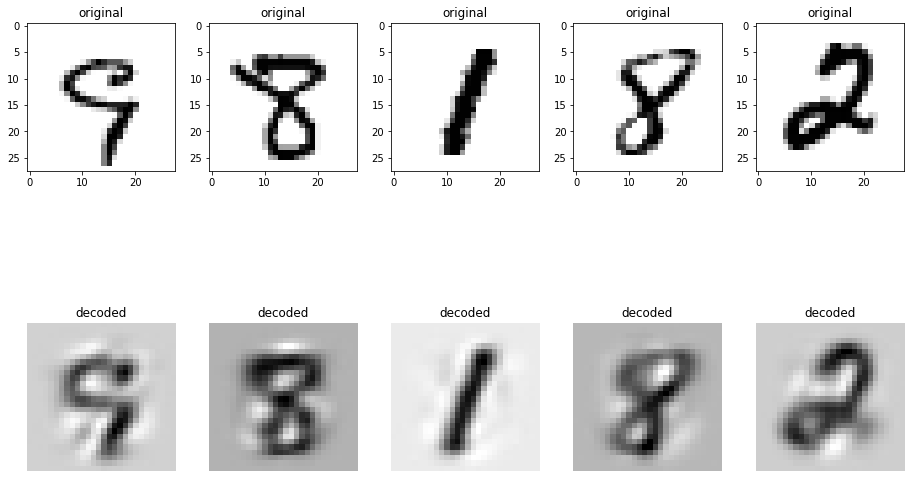

In [6]:
cmap = 'binary'
fig = plt.figure()

for n in range(vis_size):
  a = fig.add_subplot(2, vis_size, n + 1)
  a.set_title('original')
  implot = plt.imshow(x_sample[n].reshape((28, 28)))
  implot.set_cmap(cmap)
  
  b = fig.add_subplot(2, vis_size, n + vis_size + 1)
  b.set_title('decoded')
  implot = plt.imshow(y_sample[n].reshape((28, 28)))
  implot.set_cmap(cmap)
  
  plt.axis('off')

fig.tight_layout()